In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('../data/train.csv', index_col=0)
X = df[['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]
y = df['Survived']

from sklearn.model_selection import train_test_split
Xtrain, Xval, ytrain, yval= train_test_split(X,y, test_size=.20, random_state=34, stratify=y) # check woith Xtrain and ytrain

df_train = pd.concat([Xtrain,ytrain], axis=1) # check with df_train.head() and df_train.shape
df_train.to_csv("eda_data.csv")


In [2]:
from sklearn.dummy import DummyClassifier
dummy_cls = DummyClassifier(strategy="most_frequent")
dummy_cls.fit(Xtrain,ytrain)
score_on_your_training_data = round(dummy_cls.score(Xtrain, ytrain),2)
score_on_your_test_data = round(dummy_cls.score(Xval, yval),2)
ytrain_value_counts = ytrain.value_counts(normalize=True)
print(f'score_on_your_training_data:',score_on_your_training_data)
print(f'score_on_your_test_data:',score_on_your_test_data)
print(ytrain_value_counts)

score_on_your_training_data: 0.62
score_on_your_test_data: 0.61
0    0.616573
1    0.383427
Name: Survived, dtype: float64


In [3]:
dummy_cls.predict(Xval)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

### Exploratory Data Analysis

Survived: 273
Not Survived: 439


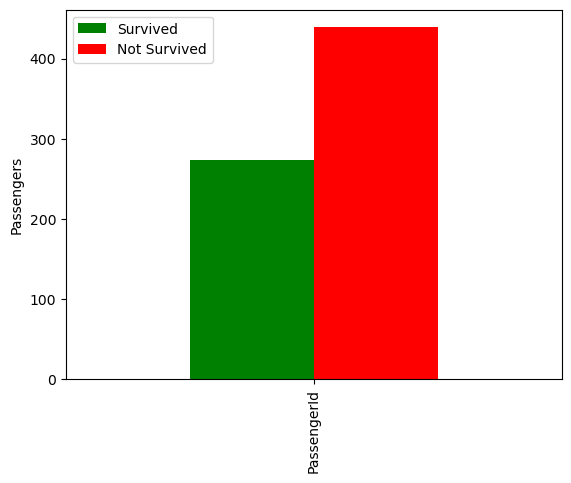

1st Class Passengers 173
1st Class Passengers - Survived 110
proportion 0.6358381502890174


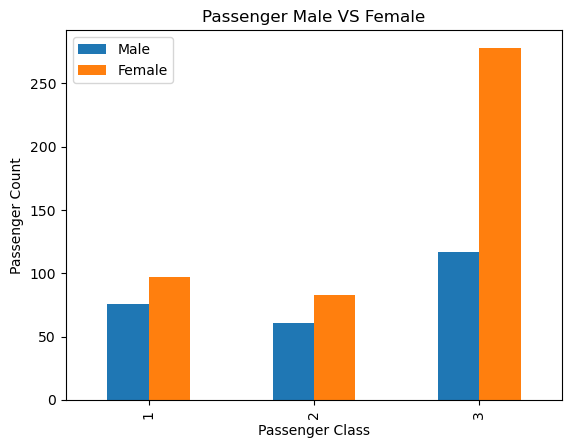

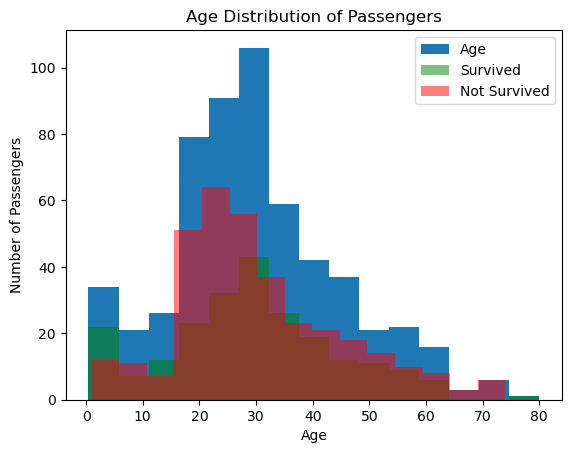

AVG Age - survived: 29.026188340807174
AVG Age - not_survived: 30.457478005865102


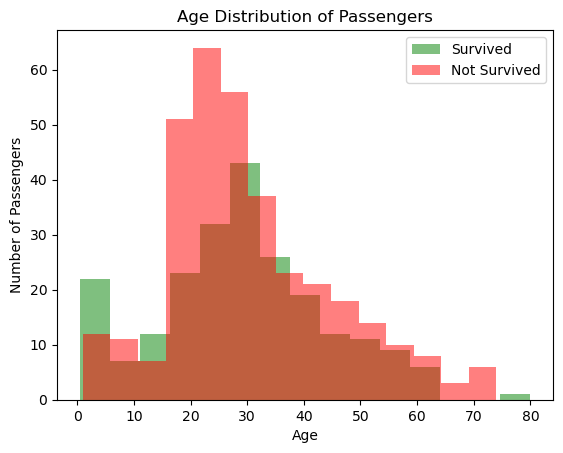

Survived       Dead  Survived
Pclass Sex                   
1      female     1        75
       male      62        35
2      female     4        57
       male      70        13
3      female    59        58
       male     243        35


In [4]:
df = pd.read_csv("eda_data.csv")
test_for_kaggle = pd.read_csv("../data/test.csv") # check df.head() and test_for_kaggle.head()

# Exploratory data analysis.
survived = df[df["Survived"] == 1].shape[0] # shape[0] to get the number of raws with given statement
not_survived = df[df["Survived"] == 0].shape[0]
data = {'Survived': survived, 'Not Survived': not_survived}
df_data = pd.DataFrame(data, index=['PassengerId'])
print("Survived:", survived)
print("Not Survived:", not_survived)

# Create a plot.
df_data.plot(kind='bar', color=['green', 'red'])
plt.ylabel('Passengers')
plt.show()

# Calculate the proportion of surviving 1st class passengers.
first_class_passengers = df[df["Pclass"] == 1].shape[0]
first_class_passengers_survived = df[(df['Pclass'] == 1) & (df["Survived"] == 1)].shape[0]
proportion = first_class_passengers_survived/first_class_passengers
print("1st Class Passengers", first_class_passengers)
print("1st Class Passengers - Survived", first_class_passengers_survived)
print("proportion", proportion)

# Bar chart Passengers Male vs Female
table = df.pivot_table(values='PassengerId', index='Pclass', columns='Sex', aggfunc='count')
table.plot(kind='bar')
plt.xlabel('Passenger Class')
plt.ylabel('Passenger Count')
plt.title('Passenger Male VS Female')
plt.legend(['Male', 'Female'])
plt.show()

# Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.
df['Age'].plot.hist(bins=15);
# Exclude some NaN values
df2 = df.dropna(subset=["Age"]) # for check df2.shape
df2[df2["Survived"] == 1]["Age"].plot.hist(bins=15, alpha=0.5, color='green', label= "Survived");
df2[df2["Survived"] == 0]["Age"].plot.hist(bins=15, alpha=0.5, color='red', label= "Not Survived");
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.title("Age Distribution of Passengers")
plt.legend()
plt.show()

# Calculate the average age for survived and drowned passengers separately.
avg_survived = df2[df2["Survived"] == 1]["Age"].mean() 
avg_not_survived = df2[df2["Survived"] == 0]["Age"].mean()
print("AVG Age - survived:", avg_survived)
print("AVG Age - not_survived:", avg_not_survived)


df2[df2["Survived"] == 1]["Age"].plot.hist(bins=15, alpha=0.5, color='green', label= "Survived");
df2[df2["Survived"] == 0]["Age"].plot.hist(bins=15, alpha=0.5, color='red', label= "Not Survived");
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.title("Age Distribution of Passengers")
plt.legend()
plt.show()

# Replace missing Values with Mean
df.loc[(df["Survived"] == 1) & (df["Age"].isna()), "Age"] = avg_survived #isna() funcion is looking for missing values
df.loc[(df["Survived"] == 0) & (df["Age"].isna()), "Age"] = avg_not_survived
# Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.
table = pd.pivot_table(df, values='PassengerId', index=['Pclass', 'Sex'], columns=['Survived'], aggfunc='count')
table.rename(columns={0: 'Dead', 1: 'Survived'}, inplace=True) # to rename the columns
print(table)

### Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# input feature
X = df[['Pclass']]  # to select the input features [[]] -> dataframe, matrix
# target variable
y = df['Survived'] # to select the target (dependent) variable [] > Series, array

# instantiate the model 
m_lgr = LogisticRegression() # build the model
m_lgr.fit(X,y) # fit the model (train the model)
# Get the coef w_0 and w_1 
w1 = m_lgr.coef_
w0 = m_lgr.intercept_
m_lgr.classes_ # classes - it is n array
print(f'Model feature coefficient :{w1}\nModel intercept/bias: {w0}')
print(m_lgr.classes_)

# Get the estimated probabilities
estim_prob = m_lgr.predict_proba(X)
estim_prob.round(3)

# Let's transform the estim_prob to a padatframe with the proper column header
estim_prob_df = pd.DataFrame(data=estim_prob, columns=m_lgr.classes_)
estim_prob_df

Model feature coefficient :[[-0.87835906]]
Model intercept/bias: [1.51060298]
[0 1]


,0,1
0,0.347002,0.652998
1,0.561220,0.438780
2,0.561220,0.438780
3,0.754818,0.245182
4,0.561220,0.438780
...,...,...
707,0.754818,0.245182
708,0.754818,0.245182
709,0.754818,0.245182
710,0.754818,0.245182


### Further Adjustments

In [6]:
# e.g. 0.5 treshold
(estim_prob_df[(0)] >= 0.5).astype('int').replace({0:"Not Survived", 1:"Survived"})

0      Not Survived
1          Survived
2          Survived
3          Survived
4          Survived
           ...     
707        Survived
708        Survived
709        Survived
710        Survived
711        Survived
Name: 0, Length: 712, dtype: object

In [7]:
# Calculate the prediction from estim_prob_df

y_pred = (estim_prob_df[(0)] >= 0.5).astype('int').replace({0:"Not Survived",1:"Survived"})

# Calculate the prediction 
y_pred = m_lgr.predict(X)
print(y_pred)

# Calculate the accuracy
accuracy = m_lgr.score(X,y)
print(f'the Logistic regression has achieved an accuracy score: {round(accuracy,3)}')

[1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0
 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0
 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0
 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0
 0 1 0 0 1 1 0 0 0 0 0 1 

In [8]:
# Calculate the accuracy
accuracy = m_lgr.score(X,y)
print(f'the Logistic regression has achieved an accuracy score: {round(accuracy,3)}')

the Logistic regression has achieved an accuracy score: 0.683


### Prediction of the X Values.

In [9]:
m_lgr.predict_proba(X) # values are positiv

array([[0.34700191, 0.65299809],
       [0.56122007, 0.43877993],
       [0.56122007, 0.43877993],
       ...,
       [0.75481769, 0.24518231],
       [0.75481769, 0.24518231],
       [0.75481769, 0.24518231]])

In [10]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,84,1,"Carrau, Mr. Francisco M",male,28.0,0,0,113059,47.1000,NaN,S,0
1,723,2,"Gillespie, Mr. William Henry",male,34.0,0,0,12233,13.0000,NaN,S,0
2,162,2,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",female,40.0,0,0,C.A. 33595,15.7500,NaN,S,1
3,92,3,"Andreasson, Mr. Paul Edvin",male,20.0,0,0,347466,7.8542,NaN,S,0
4,828,2,"Mallet, Master. Andre",male,1.0,0,2,S.C./PARIS 2079,37.0042,NaN,C,1


In [11]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,84,1,"Carrau, Mr. Francisco M",male,28.0,0,0,113059,47.1000,NaN,S,0
1,723,2,"Gillespie, Mr. William Henry",male,34.0,0,0,12233,13.0000,NaN,S,0
2,162,2,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",female,40.0,0,0,C.A. 33595,15.7500,NaN,S,1
3,92,3,"Andreasson, Mr. Paul Edvin",male,20.0,0,0,347466,7.8542,NaN,S,0
4,828,2,"Mallet, Master. Andre",male,1.0,0,2,S.C./PARIS 2079,37.0042,NaN,C,1


In [12]:
Xtrain.corr()

/var/folders/mw/n817bzb12h7cgmbzvpg9_dd40000gp/T/ipykernel_7285/3581238859.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Xtrain.corr()


,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.381201,0.085523,0.020647,-0.535564
Age,-0.381201,1.000000,-0.317917,-0.185836,0.108109
SibSp,0.085523,-0.317917,1.000000,0.430437,0.157803
Parch,0.020647,-0.185836,0.430437,1.000000,0.217704
Fare,-0.535564,0.108109,0.157803,0.217704,1.000000


In [13]:
Xtrain.describe()

,Pclass,Age,SibSp,Parch,Fare
count,712.000000,564.000000,712.000000,712.000000,712.000000
mean,2.311798,29.891560,0.525281,0.387640,32.055916
std,0.837568,14.895223,1.107159,0.808718,50.017039
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.875000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.456250
75%,3.000000,38.000000,1.000000,0.000000,31.387500
max,3.000000,80.000000,8.000000,6.000000,512.329200


### Feature Engiinering

* which variable has missing values?
* which variables are binary, categorical, metric?

In [14]:
Xtrain.isna().sum() # check for NaN values

Pclass        0
Name          0
Sex           0
Age         148
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       550
Embarked      2
dtype: int64

* Age: NaN Imputation with AVG -> Binning Scaling (Pipeline check)
* Embarked: categorical - NaN Imputation - One Hot Encoding
* Pclass: categorical - One Hot Encoding
* Sex: categorical - One Hot Encoding
* SibSp + Parc: combine them as one value 

* Name: - exclude as not important for the further analysis
* Cabin - exclude as not enough values for some statements

In [15]:
Xtrain_new = Xtrain[['Embarked', 'Pclass', 'Sex', 'Age']]
                     #, 'SibSp', 'Parch']]
Xtrain_new
                     

,Embarked,Pclass,Sex,Age
PassengerId,,,,
84,S,1,male,28.0
723,S,2,male,34.0
162,S,2,female,40.0
92,S,3,male,20.0
828,C,2,male,1.0
...,...,...,...,...
509,S,3,male,28.0
650,S,3,female,23.0
475,S,3,female,22.0


In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler

In [17]:
Xtrain_new.isna().sum() # check for NaN values

Embarked      2
Pclass        0
Sex           0
Age         148
dtype: int64

In [18]:
imputer_ohe_embarked = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(sparse_output=False)) 
imputer_ohe_embarked


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder', OneHotEncoder(sparse_output=False))])

In [19]:
imputer_bins_age = make_pipeline(SimpleImputer(strategy="median"), KBinsDiscretizer(n_bins=5, encode='onehot-dense', strategy='quantile'))
imputer_bins_age

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('kbinsdiscretizer', KBinsDiscretizer(encode='onehot-dense'))])

In [20]:
#(name, transformer, columns)
fe = ColumnTransformer([
    ("pclass", OneHotEncoder(sparse_output=False), ["Pclass"] ),
    ("sex", OneHotEncoder(sparse_output=False), ["Sex"] ),
    ("embarked", imputer_ohe_embarked, ["Embarked"] ),
    ("age", imputer_bins_age,["Age"])
])
fe

ColumnTransformer(transformers=[('pclass', OneHotEncoder(sparse_output=False),
                                 ['Pclass']),
                                ('sex', OneHotEncoder(sparse_output=False),
                                 ['Sex']),
                                ('embarked',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['Embarked']),
                                ('age',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('kbinsdiscretizer',
                                                  KBinsDiscretizer(encode='onehot-dense'))]),
                                 ['Age'])])

In [21]:
# fit the column transformer on the training data # learning the classes of transformations
fe.fit(Xtrain_new)

# transform the training data
Xtrain_tran = fe.transform(Xtrain_new)
pd.DataFrame(Xtrain_tran, columns=fe.get_feature_names_out()) #to check .isna().sum()

/Users/mykolawauer/opt/anaconda3/envs/scikit_env/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


,pclass__Pclass_1,pclass__Pclass_2,pclass__Pclass_3,sex__Sex_female,sex__Sex_male,embarked__Embarked_C,embarked__Embarked_Q,embarked__Embarked_S,age__Age_0.0,age__Age_1.0,age__Age_2.0,age__Age_3.0
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
707,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
708,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
709,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
710,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [22]:
# Building the model together with feature engeenering
one_go_mlr= make_pipeline(fe, LogisticRegression(max_iter=10000))
one_go_mlr

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pclass',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['Pclass']),
                                                 ('sex',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['Sex']),
                                                 ('embarked',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['Embarked']),
                                                 ('age',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('kbinsdiscretizer',
                                                                   KBinsDiscretizer(encode='onehot-dense'))]),
                                                  ['Age'])])),
                ('logisticregression', LogisticRegression(max_iter=10000))])

#### Train Model

In [23]:
# initialize the model 
m_lgr = LogisticRegression()
# fit the model on the transformed training data
m_lgr.fit(Xtrain_tran,ytrain)

LogisticRegression()

In [24]:
m_lgr.score(Xtrain_tran,ytrain) #accuracy score

0.7949438202247191

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [39]:
Xtrain_tran.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [38]:
forest = []

for i in range(100):
    sample = Xtrain_tran.sample(50)
    X = sample[['Pclass', 'Age', 'Sex']]
    y = sample['Survived']
    tree = DecisionTreeClassifier(max_depth=2)
    tree.fit(X, y)
    forest.append(tree)

AttributeError: 'numpy.ndarray' object has no attribute 'sample'

## Evaluate the model on the transformed validation data

In [25]:
Xval_tran = fe.transform(Xval)
pd.DataFrame(Xval_tran, columns=fe.get_feature_names_out())

,pclass__Pclass_1,pclass__Pclass_2,pclass__Pclass_3,sex__Sex_female,sex__Sex_male,embarked__Embarked_C,embarked__Embarked_Q,embarked__Embarked_S,age__Age_0.0,age__Age_1.0,age__Age_2.0,age__Age_3.0
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
174,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
175,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
176,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
177,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
m_lgr.score(Xval_tran,yval) #accuracy score...over or underfitting?

0.7597765363128491

### Pickle - Creation of Model and Transformer Fiule

In [27]:
import pickle 


In [28]:
with open('model_1.pkl', 'wb') as file: #'wb' is a mode in which the file is opened for writing binary data.
    pickle.dump(m_lgr, file) 
    

In [29]:
with open('feature_1.pkl', 'wb') as file:
    pickle.dump(fe, file)
    